In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# # Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

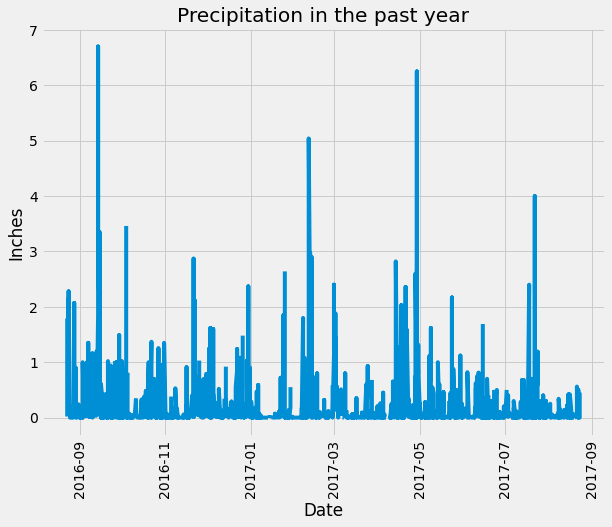

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sql = session.query(
    Measurement.prcp,
    Measurement.date).filter(Measurement.date > '2016-08-22')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql_query(sql.statement,con = engine)

# Sort the dataframe by date
df.rename(columns={'prcp':'precipitation'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date', ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data
y_values = df['precipitation']
x_values = df['date']
plt_1 = plt.figure(figsize=(9, 7))
plt.plot(x_values,y_values)
plt.title('Precipitation in the past year')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df['precipitation'].describe()
summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
result =  session.query(func.count(Measurement.station.distinct())).all()
result

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station).label('num'))\
    .group_by('station').order_by(desc('num')).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs),
                            func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

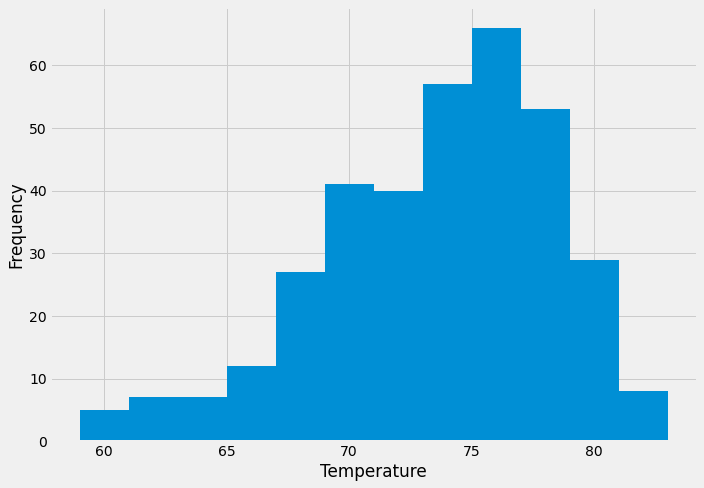

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df= pd.DataFrame(
    session.query(Measurement.tobs).filter(
    Measurement.station == 'USC00519281',
    Measurement.date > '2016-08-22').all()
    )

fig, acv = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
acv.hist(df.tobs, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [17]:
# Close Session
session.close()